In [34]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pylab
from os import scandir

/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


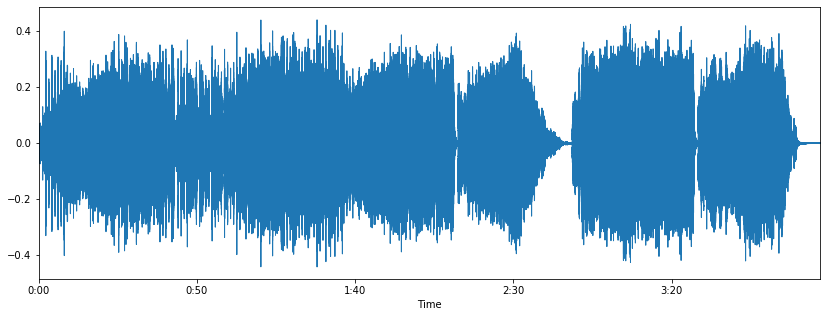

In [2]:
filename = '../../../PDG-Data/Songs/313.mp3'
y, sr = librosa.load(filename)
# trim silent edges
plt.figure(figsize=(14, 5))
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

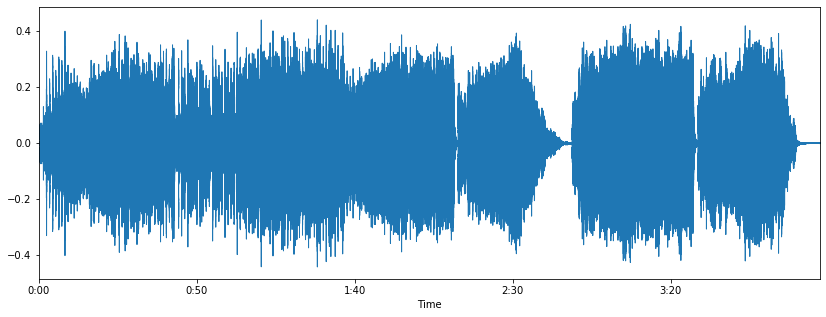

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr)

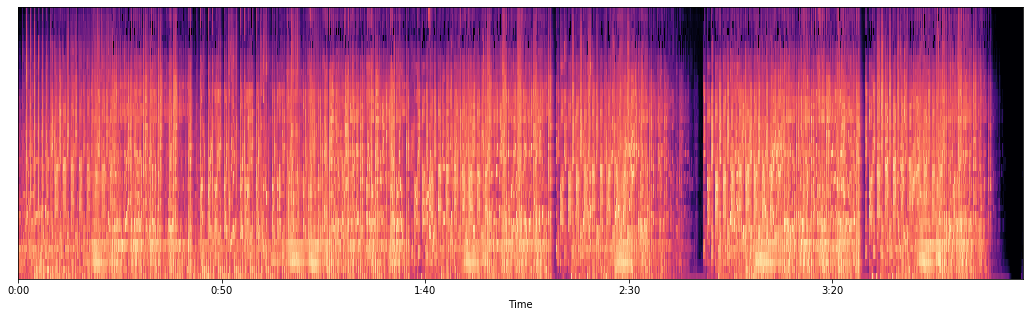

In [30]:
save_path = "./Data/Spectrograms/313.jpg"

n_mels = 40
hop_length = 512
n_fft = 2048

fig, ax1 = plt.subplots(1,1, figsize = (18,5))
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
#librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
#                         x_axis='time', y_axis='mel');

librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time');


#plt.colorbar(format='%+2.0f dB');

#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()
plt.show()

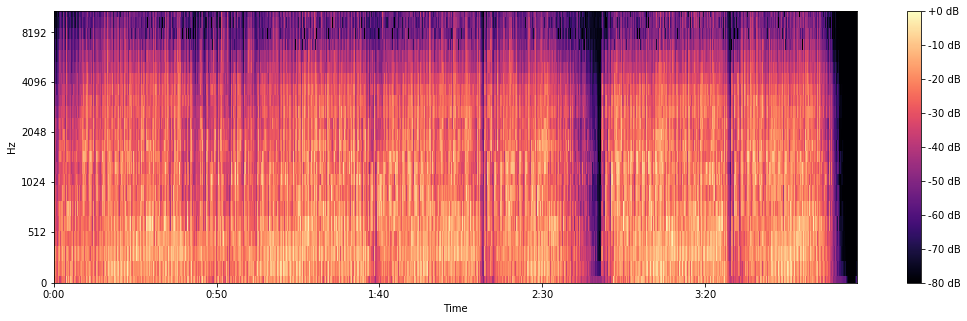

In [5]:
n_mels = 23
hop_length = 200
n_fft = 500

fig, ax1 = plt.subplots(1,1, figsize = (18,5))
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');


In [6]:

S_DB = librosa.feature.melspectrogram(y, sr=sr, power=2.0)

Sdb_brahms = librosa.power_to_db(S_DB)

In [7]:
Sdb_brahms

array([[-55.485683, -45.869045, -46.074326, ..., -43.12242 , -40.254555,
        -43.59916 ],
       [-56.557915, -44.80923 , -40.445103, ..., -36.745247, -41.437893,
        -53.69411 ],
       [-56.557915, -47.10165 , -44.19216 , ..., -38.72735 , -42.23703 ,
        -53.2855  ],
       ...,
       [-56.557915, -56.557915, -56.557915, ..., -56.557915, -56.557915,
        -56.557915],
       [-56.557915, -56.557915, -56.557915, ..., -56.557915, -56.557915,
        -56.557915],
       [-56.557915, -56.557915, -56.557915, ..., -56.557915, -56.557915,
        -56.557915]], dtype=float32)

In [8]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct

filename = '../../../PDG-Data/Songs/313.wav'
sample_rate, signal = scipy.io.wavfile.read(filename)  # File assumed to be in the same directory
signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds

In [9]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

In [10]:
frame_size = 0.025 
frame_stride = 0.01

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [11]:
frames

array([[ 0.0000e+00,  0.0000e+00, -1.0000e+00, ..., -3.0000e-02,
         0.0000e+00,  9.7000e-01],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e+00,  0.0000e+00],
       ...,
       [ 1.6700e+01, -1.7620e+01, -6.2000e-01, ...,  4.6280e+01,
        -2.1464e+02,  1.0860e+01],
       [-8.6590e+01,  1.4782e+02,  2.5490e+01, ..., -4.9810e+01,
        -4.3300e+00,  1.9810e+01],
       [-3.6910e+01, -7.0100e+01,  9.4980e+01, ...,  3.8110e+01,
         5.9090e+01,  9.0950e+01]])

In [12]:
frames *= numpy.hamming(frame_length)

In [13]:
NFFT = 512

mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [14]:
nfilt = 40
low_freq_mel = 0


high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

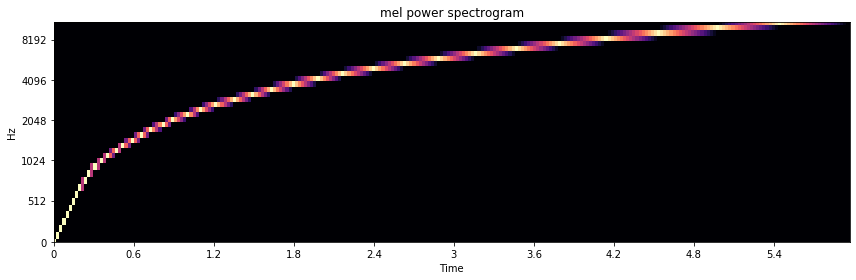

In [15]:
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(fbank, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
# plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()

In [16]:
num_ceps = 12

mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13


In [17]:


(nframes, ncoeff) = mfcc.shape
n = numpy.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * numpy.sin(numpy.pi * n / cep_lifter)
mfcc *= lift  #*

NameError: name 'cep_lifter' is not defined

In [ ]:
filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)

In [ ]:
mfcc -= (numpy.mean(mfcc, axis=0) + 1e-8)

/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


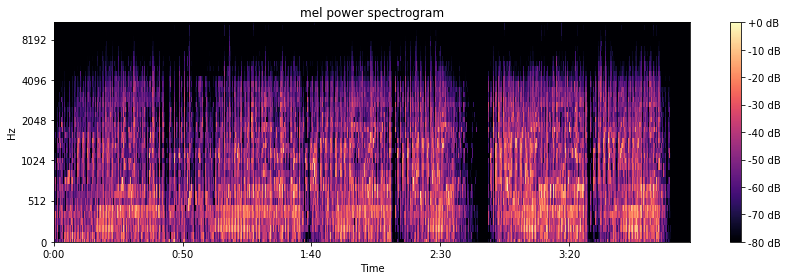

In [27]:
# Mostly taken from: http://nbviewer.ipython.org/github/bmcfee/librosa/blob/master/examples/LibROSA%20demo.ipynb

import librosa
import matplotlib.pyplot as plt

# Load sound file
y, sr = librosa.load("../../../PDG-Data/Songs/313.mp3")

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=40)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S, ref=np.max)
# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()
plt.show()

In [35]:
def ls(path): 
    return [obj.name for obj in scandir(path) if obj.is_file()]

['362.mp3',
 '313.wav',
 '02 Watusi Boogaloo.mp3',
 '02 Sol De Mi Vida.mp3',
 '10 Mí China.mp3',
 '01 Temperatura.mp3',
 '394.mp3',
 '404.mp3',
 '347.mp3',
 '02 Soledad.mp3',
 '313.mp3']

In [40]:
path = '../../../PDG-Data/Songs'
songs = ls(path)

for song in songs:
    print(song)
    file_path = path+"/"+song
    y, sr = librosa.load(file_path)
    # trim silent edges
    #plt.figure(figsize=(14, 5))
    whale_song, _ = librosa.effects.trim(y)
    save_path = "./Data/Spectrograms/"+song+".jpg"

    n_mels = 40
    hop_length = 512
    n_fft = 2048

    fig, ax1 = plt.subplots(1,1, figsize = (18,5))
    S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                       hop_length=hop_length, 
                                       n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    #librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
    #                         x_axis='time', y_axis='mel');

    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                             x_axis='time');


    #plt.colorbar(format='%+2.0f dB');

    pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
    pylab.close()
    #plt.show()

362.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


313.wav
02 Watusi Boogaloo.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


02 Sol De Mi Vida.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


10 Mí China.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


01 Temperatura.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


394.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


404.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


347.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


02 Soledad.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


313.mp3


/home/jesuspaz/anaconda3/envs/Keras/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
